In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os 

import matplotlib.pyplot as plt 
from PIL import Image

In [2]:
# 디렉토리 내 파일리스트 가져오기
def list_dir(path):
    filenames = os.listdir(path)
    filenames.sort()
    return filenames

In [3]:
# 이미지 사이즈 조정 후 array형으로 반환
def load_image_pixels(imagepath, resolution):
    img         = Image.open(imagepath)
    img_resized = img.resize(resolution)
    return np.array(img_resized)

In [4]:
# 원핫벡터화
def onehot(idxs, cnt):
    return np.eye(cnt)[idxs]

In [5]:
resolution  = [128,128]

def font_init(resolution):
    target_names = list_dir(path)

    images = []
    idxs   = []

    for dx, dname in enumerate(target_names):
        print("dname :", dname)
        subpath = path + '/' + dname
        print("subpath :", subpath)
        filenames = list_dir(subpath)
        print("filenames :\n", filenames[:3])

        for fname in filenames:
            if fname[-4:] != '.png':
                continue
            imagepath = os.path.join(subpath, fname)
            pixels = load_image_pixels(imagepath, resolution)
            images.append(pixels)
            idxs.append(dx)

    xs = np.asarray(images, dtype = np.float32)       
    
    # 생성한 onehot() 함수를 연결 
    ys = onehot(idxs = idxs, cnt = len(target_names))
    
    # 독립변수 xs와 종속변수 ys를 반환
    return xs, ys   

# train data

In [6]:
path = 'C:/Users/gitct/Documents/tfgpu_33/ttf_path/image_train/'
xs, ys = font_init(resolution=resolution)

dname : (Old-Modern) SenzaBella-Bold
subpath : C:/Users/gitct/Documents/tfgpu_33/ttf_path/image_train//(Old-Modern) SenzaBella-Bold
filenames :
 ['(Old-Modern) SenzaBella-Bold_0(1).png', '(Old-Modern) SenzaBella-Bold_0(10).png', '(Old-Modern) SenzaBella-Bold_0(11).png']
dname : Anonymous Pro-Regular
subpath : C:/Users/gitct/Documents/tfgpu_33/ttf_path/image_train//Anonymous Pro-Regular
filenames :
 ['Anonymous Pro-Regular_0(1).png', 'Anonymous Pro-Regular_0(10).png', 'Anonymous Pro-Regular_0(11).png']
dname : Arbutus Slab-Regular
subpath : C:/Users/gitct/Documents/tfgpu_33/ttf_path/image_train//Arbutus Slab-Regular
filenames :
 ['Arbutus Slab-Regular_0(1).png', 'Arbutus Slab-Regular_0(10).png', 'Arbutus Slab-Regular_0(11).png']
dname : B612Mono-Bold
subpath : C:/Users/gitct/Documents/tfgpu_33/ttf_path/image_train//B612Mono-Bold
filenames :
 ['B612Mono-Bold_0(1).png', 'B612Mono-Bold_0(10).png', 'B612Mono-Bold_0(11).png']
dname : Butter-Unsalted
subpath : C:/Users/gitct/Documents/tfgpu_3

In [7]:
print("xs.shape : ", xs.shape)
print("ys.shape : ", ys.shape)
print("xs.max() :", xs.max())
print("xs.min() :", xs.min())

xs.shape :  (49600, 128, 128, 3)
ys.shape :  (49600, 10)
xs.max() : 255.0
xs.min() : 0.0


In [8]:
# MIN-MAX 정규화
xs_norm = xs / 255.0
print(xs_norm.min())
print(xs_norm.max())

0.0
1.0


In [9]:
# 데이터 인덱스 shuffle하기
shuffle_map = np.arange(xs_norm.shape[0])
np.random.shuffle(shuffle_map)
print(shuffle_map)

[36960 32870  6665 ... 22561 39622 33557]


In [10]:
train_x = xs_norm
train_y = ys

# test data

In [11]:
path = 'C:/Users/gitct/Documents/tfgpu_33/ttf_path/image_test/'
XS, YS = font_init(resolution=resolution)

dname : (Old-Modern) SenzaBella-Bold
subpath : C:/Users/gitct/Documents/tfgpu_33/ttf_path/image_test//(Old-Modern) SenzaBella-Bold
filenames :
 ['(Old-Modern) SenzaBella-Bold_0(1).png', '(Old-Modern) SenzaBella-Bold_0(10).png', '(Old-Modern) SenzaBella-Bold_0(11).png']
dname : Anonymous Pro-Regular
subpath : C:/Users/gitct/Documents/tfgpu_33/ttf_path/image_test//Anonymous Pro-Regular
filenames :
 ['Anonymous Pro-Regular_0(1).png', 'Anonymous Pro-Regular_0(10).png', 'Anonymous Pro-Regular_0(11).png']
dname : Arbutus Slab-Regular
subpath : C:/Users/gitct/Documents/tfgpu_33/ttf_path/image_test//Arbutus Slab-Regular
filenames :
 ['Arbutus Slab-Regular_0(1).png', 'Arbutus Slab-Regular_0(10).png', 'Arbutus Slab-Regular_0(11).png']
dname : B612Mono-Bold
subpath : C:/Users/gitct/Documents/tfgpu_33/ttf_path/image_test//B612Mono-Bold
filenames :
 ['B612Mono-Bold_0(1).png', 'B612Mono-Bold_0(10).png', 'B612Mono-Bold_0(11).png']
dname : Butter-Unsalted
subpath : C:/Users/gitct/Documents/tfgpu_33/tt

In [12]:
print("XS.shape : ", XS.shape)
print("YS.shape : ", YS.shape)

XS.shape :  (11904, 128, 128, 3)
YS.shape :  (11904, 16)


In [13]:
# MIN-MAX 정규화
XS_norm = XS / 255.0
print(XS_norm.min())
print(XS_norm.max())

0.0
1.0


In [14]:
# 데이터 인덱스 shuffle하기
shuffle_map2 = np.arange(XS_norm.shape[0])
np.random.shuffle(shuffle_map2)
print(shuffle_map2)

[ 7248  3100  4996 ... 10365  5352   816]


In [15]:
test_x = XS_norm
test_y = YS

In [16]:
# train, test 데이터 shape 확인
print("train_x.shape : ", train_x.shape)
print("train_y.shape : ", train_y.shape)
print("test_x.shape : ", test_x.shape)
print("test_y.shape : ", test_y.shape)

train_x.shape :  (49600, 128, 128, 3)
train_y.shape :  (49600, 10)
test_x.shape :  (11904, 128, 128, 3)
test_y.shape :  (11904, 16)


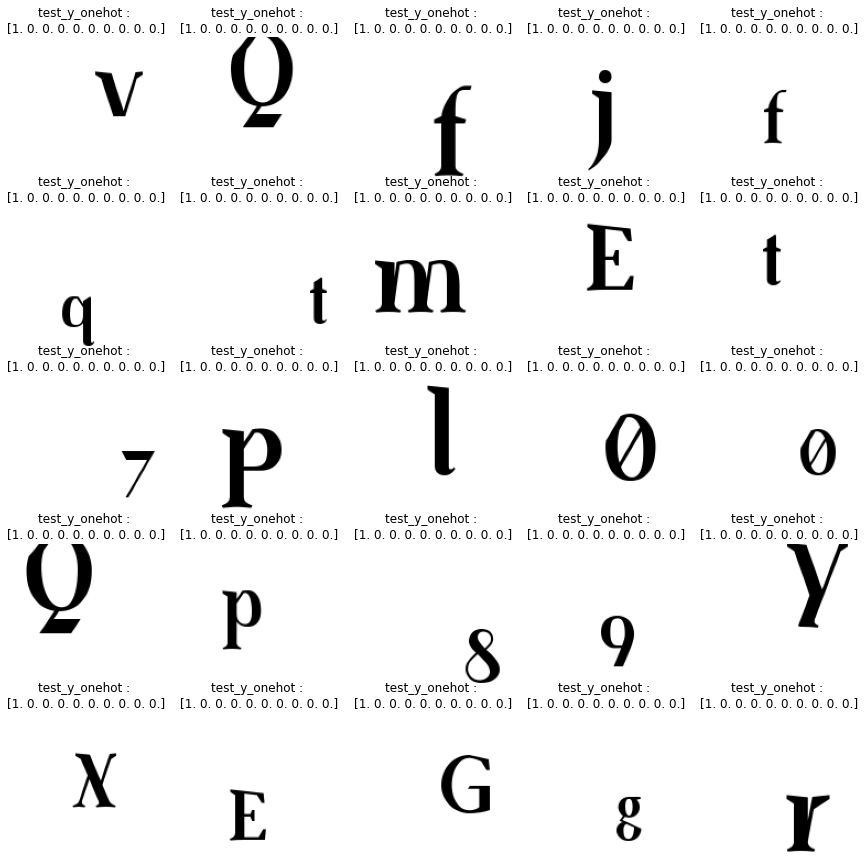

In [17]:
# 생성된 학습데이터 미리보기
plt.figure(figsize=(15,15))

for i in range(25):
    plt.subplot(5,5, i+1)
    i = np.random.choice(4880)
    img = train_x[i]
#    img_image = Image.fromarray(np.uint8(img))
    plt.title('test_y_onehot : \n{}'.format(train_y[i]))
    plt.axis('off')
    plt.imshow(img)

plt.show()

In [18]:
# 모델 생성
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(128,128,3),kernel_size=(3,3),filters=32,padding='same',activation='relu'),
    tf.keras.layers.Conv2D(input_shape=(128,128,32),kernel_size=(3,3),filters=64,padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters = 128, padding = 'same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters = 256, padding = 'valid', activation='relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units=256, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units=10, activation = 'softmax')
])

In [19]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 62, 62, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 256)       0

In [20]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [21]:
# from keras.callbacks import EarlyStopping
# import keras

# checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=1, 
#                                                    save_best_only=True,mode='auto')
# stop_cb = keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights= True, patience=8, verbose=1)

In [22]:
# 모델 학습
history = model_2.fit(train_x, train_y,
                      epochs = 20,
                      validation_split = 0.01,
                      batch_size = 4)

Train on 49104 samples, validate on 496 samples
Epoch 1/20
49104/49104 [==============================] - 249s 5ms/sample - loss: 1.5011 - accuracy: 0.4058 - val_loss: 1.4752 - val_accuracy: 0.4375
Epoch 2/20
49104/49104 [==============================] - 247s 5ms/sample - loss: 0.6956 - accuracy: 0.7317 - val_loss: 0.9202 - val_accuracy: 0.6149
Epoch 3/20
49104/49104 [==============================] - 247s 5ms/sample - loss: 0.4342 - accuracy: 0.8413 - val_loss: 1.1410 - val_accuracy: 0.5847
Epoch 4/20
49104/49104 [==============================] - 248s 5ms/sample - loss: 0.2767 - accuracy: 0.9033 - val_loss: 0.7996 - val_accuracy: 0.7278
Epoch 5/20
49104/49104 [==============================] - 247s 5ms/sample - loss: 0.1931 - accuracy: 0.9358 - val_loss: 1.3927 - val_accuracy: 0.6331
Epoch 6/20
49104/49104 [==============================] - 247s 5ms/sample - loss: 0.1501 - accuracy: 0.9517 - val_loss: 0.8680 - val_accuracy: 0.7399
Epoch 7/20
49104/49104 [============================

In [23]:
# # 모델 저장
model_2.save('font_test_0.01_4.h5')

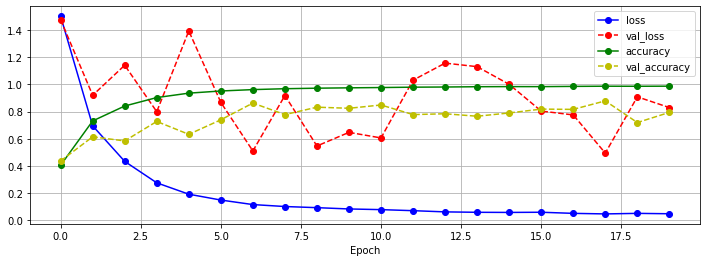

In [24]:
# 손실 및 정확도
plt.figure(figsize = (12,4))

plt.plot(history.history['loss'],        'b-o', label = 'loss')
plt.plot(history.history['val_loss'],    'r--o',label = 'val_loss')
plt.plot(history.history['accuracy'],    'g-o', label = 'accuracy')
plt.plot(history.history['val_accuracy'],'y--o',label = 'val_accuracy')
plt.xlabel('Epoch')

plt.grid()
plt.legend()
plt.show()

In [25]:
# # 모델 평가
# model_2.evaluate(test_x, test_y)

In [26]:
# 모델 예측
pred_y = model_2.predict(test_x)
print(np.round(pred_y, 4))

[[1.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [9.999e-01 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 3.300e-03 ... 0.000e+00 0.000e+00 2.000e-04]]


pred_y_16 -> 0
test_y_16 -> 0
pred_y_Prob : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


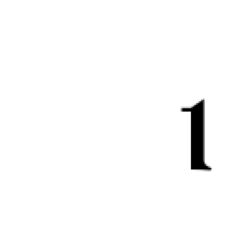

In [27]:
# 예측 결과 샘플 하나만 보기
test_index = 16
print("pred_y_{} -> {}".format(test_index, np.argmax(pred_y[test_index])))

print("test_y_{} -> {}".format(test_index, np.argmax(test_y[test_index])))

print("pred_y_Prob : {}".format(np.round(pred_y[test_index],3)))

img = test_x[test_index]
plt.imshow(img)
plt.axis('off')
plt.show()

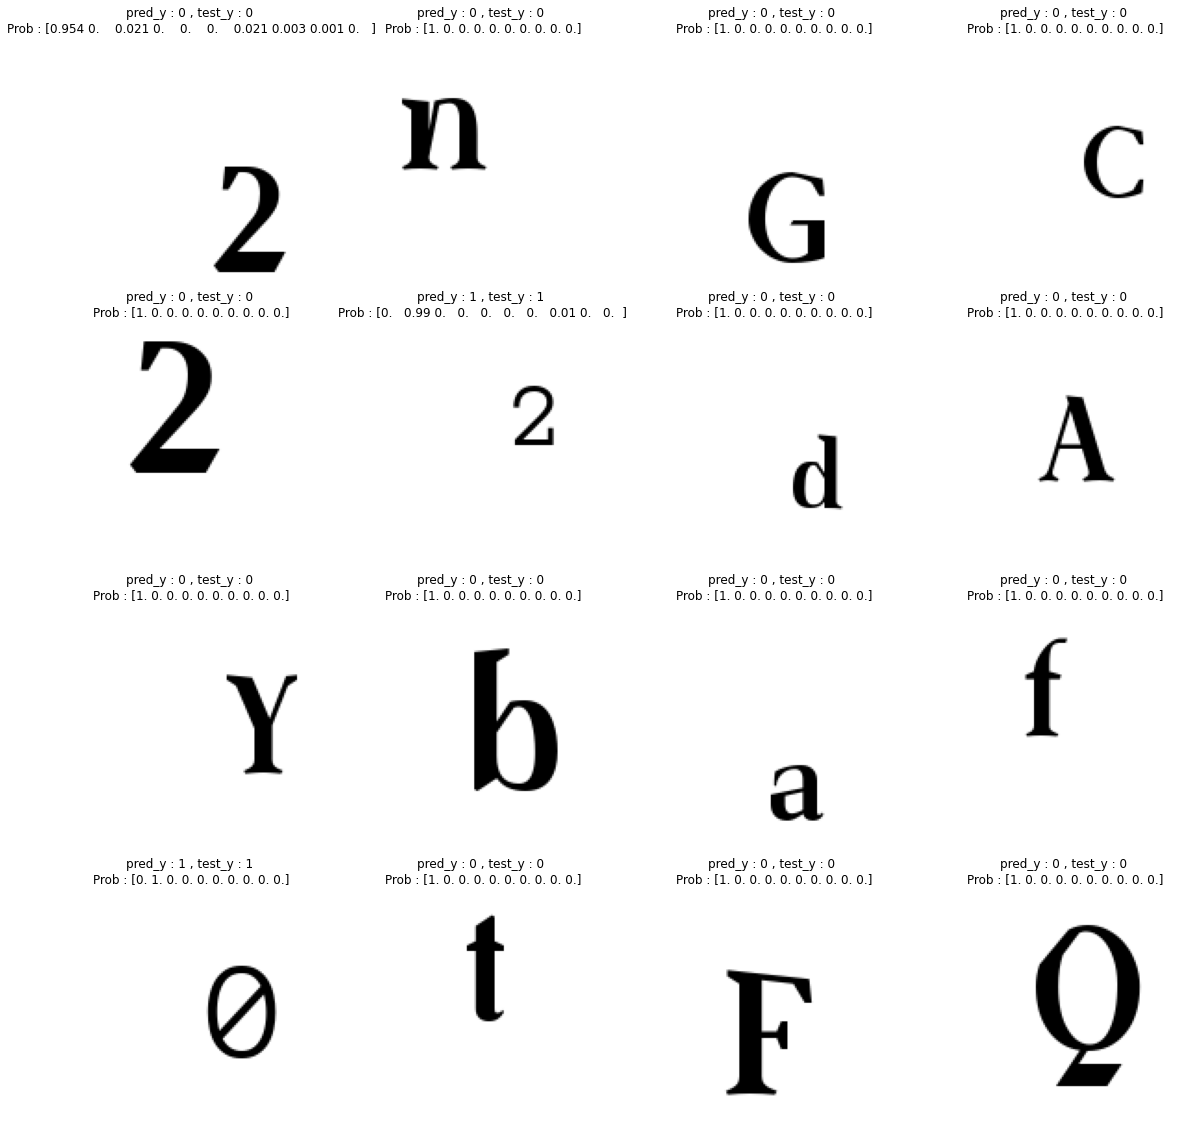

In [28]:
# 예측 결과 샘플 여러개 보기
plt.figure(figsize=(20,20))

for i in range(16):
    
    plt.subplot(4,4,i+1)
    
    i = np.random.choice(864)
    img = test_x[i]
    plt.imshow(img)
    
    plt.title('pred_y : {} , test_y : {} \nProb : {}'.format(np.argmax(pred_y[i]), np.argmax(test_y[i]), np.round(pred_y[i],3)))
    plt.axis('off')

plt.draw()